## `Project Title: Customer Churn Prediction`

### `Introduction:`

At Sunbase, our unwavering commitment to customer satisfaction is at the heart of everything we do. To ensure we continue to meet and exceed our customers' expectations, we are embarking on a mission to develop a cutting-edge machine learning model that will empower us to predict customer churn accurately. As a Machine Learning Intern at Sunbase, I am excited to take on this pivotal project, adhering to the guidelines and responsibilities outlined in the job description.


## Life cycle of Machine learning Project

- `Understanding the Problem Statement`
- `Data Collection`
- `Data Checks to perform`
- `Exploratory data analysis`
- `Data Pre-Processing (Feature Engineering and Feature Selection)`
- `Model Training`
- `Hypeparameter Tuning`
- `Choose best model`


### Problem Statement:

The primary objective of this project is to predict the probability of customer churn based on historical customer data. By leveraging machine learning algorithms and analyzing past customer behavior, the model will identify patterns and relationships that can help predict whether a customer is likely to churn or not. This predictive model will enable Sunbase to proactively address customer retention strategies and enhance overall customer satisfaction.

### Project Details:

- **Domain:** Customer Relationship Management
- **Difficulty Level:** Intermediate
- **Technologies:** Machine Learning
- **Programming Language:** Python 3.11
- **Libraries:** NumPy, Pandas, Scikit-learn, Flask (for creating a web application), Joblib (for model serialization), Matplotlib (for visualizations)

### Approach:

The project will adhere to a well-structured machine learning pipeline, encompassing the following key steps:

1. **Data Preprocessing:** This phase begins with data exploration to gain insights into the dataset's structure. Missing data and outliers will be handled to ensure data quality. Categorical variables will be encoded, and the dataset will be split into training and testing sets.

2. **Feature Engineering:** Relevant features will be generated from the dataset to enhance the model's predictive accuracy. Feature scaling or normalization will be applied as needed to ensure features are on similar scales.

3. **Model Building:** A variety of machine learning algorithms, such as logistic regression, random forest, or neural networks, will be considered for model selection. The chosen model will be trained and validated on the training dataset, and its performance will be assessed using key metrics like accuracy, precision, recall, and F1-score.

4. **Model Optimization:** Continuous model improvement is essential. Hyperparameter tuning and techniques like cross-validation will be employed to fine-tune the model and enhance its predictive capabilities.

5. **Model Deployment:** While for this assignment, we will simulate model deployment in a development environment, the ultimate goal is to deploy a production-ready system. The deployed model should accept new customer data as input and provide churn predictions.

### Expected Results:

The project aims to deliver a robust machine learning solution capable of accurately predicting customer churn. The model's ability to analyze historical customer data and forecast churn will empower Sunbase to take proactive measures to retain customers and improve overall service quality. This project aligns with the responsibilities of a Machine Learning Engineer at Sunbase, and its success will contribute to our mission of prioritizing customer satisfaction and retention.

In [2]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import warnings
# Filter out a specific warning category
warnings.filterwarnings("ignore")


# `Setting up the Project Working Directory`


In [8]:
%pwd

'/home/milan/customer_churn_prediction/research'

In [9]:
os.chdir("../")

In [10]:
%pwd

'/home/milan/customer_churn_prediction'

# `Data Collection`


In [11]:
# Read the Excel file from the URL using pandas
churn = pd.read_excel('./src/churn/data/customer_churn_large_dataset.xlsx')
# View 1st 20 records
churn.head(20)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
5,6,Customer_6,67,Male,New York,15,82.65,456,1
6,7,Customer_7,30,Female,Chicago,3,73.79,269,0
7,8,Customer_8,67,Female,Miami,1,97.70,396,1
8,9,Customer_9,20,Female,Miami,10,42.45,150,1
9,10,Customer_10,53,Female,Los Angeles,12,64.49,383,1


# `Data Checks to perform`

In [4]:
def explore_data(data):
    # Check for missing values
    missing_values = data.isnull().sum()
    print("Missing Values:\n", missing_values)

    # Check for duplicates
    duplicates = data.duplicated().sum()
    print("\nNumber of Duplicates:", duplicates)

    # Check data types
    data_types = data.dtypes
    print("\nData Types:\n", data_types)

    # Check the number of unique values of each column
    unique_values = data.nunique()
    print("\nNumber of Unique Values:\n", unique_values)

    # Check statistics of the dataset
    data_stats = data.describe()
    print("\nData Statistics:\n", data_stats)

    # Exploring the data
    print("\nData Head:")
    print(data.head())

    print("\nData Tail:")
    print(data.tail())

    print("\nData Sample:")
    print(data.sample(5))

In [5]:
explore_data(churn)

NameError: name 'churn' is not defined

# `Here are some insights gathered from the exploratory data analysis:`

1. **Missing Values:** There are no missing values in any of the columns of the dataset. This indicates that the dataset is complete, and we don't need to perform imputation for missing data.

2. **Duplicates:** There are no duplicate rows in the dataset. Each row represents a unique customer.

3. **Data Types:** The data types of the columns are as follows:
   - CustomerID: Integer
   - Name: Object (likely representing customer names)
   - Age: Integer
   - Gender: Object (likely representing customer gender)
   - Location: Object (likely representing customer location)
   - Subscription_Length_Months: Integer
   - Monthly_Bill: Float
   - Total_Usage_GB: Integer
   - Churn: Integer (likely representing churn status, where 0 indicates no churn, and 1 indicates churn)

4. **Number of Unique Values:** 
   - CustomerID and Name columns have 100,000 unique values, indicating that each customer has a unique identifier and name.
   - Age has 53 unique values, suggesting that there are 53 distinct ages among customers.
   - Gender has 2 unique values, indicating two distinct gender categories.
   - Location has 5 unique values, representing five different locations.
   - Subscription_Length_Months has 24 unique values, likely representing the different subscription durations.
   - Monthly_Bill has 7,001 unique values, suggesting significant variation in monthly billing amounts.
   - Total_Usage_GB has 451 unique values, indicating a range of total data usage values.
   - Churn has 2 unique values, representing the binary churn status (0 for no churn and 1 for churn).

5. **Data Statistics:** 
   - The average age of customers is approximately 44 years, with a minimum age of 18 and a maximum age of 70.
   - The average subscription length is about 12.5 months, with a minimum of 1 month and a maximum of 24 months.
   - Monthly billing amounts vary, with an average of approximately 65.05 and a range from 30 to 100.
   - Total data usage ranges from 50 GB to 500 GB, with an average of approximately 274.39 GB.
   - The churn column shows that roughly half of the customers (49.78%) have churned (1), while the other half have not (0).

These insights provide a preliminary understanding of the dataset's characteristics and will be useful for further data analysis and modeling in the project.

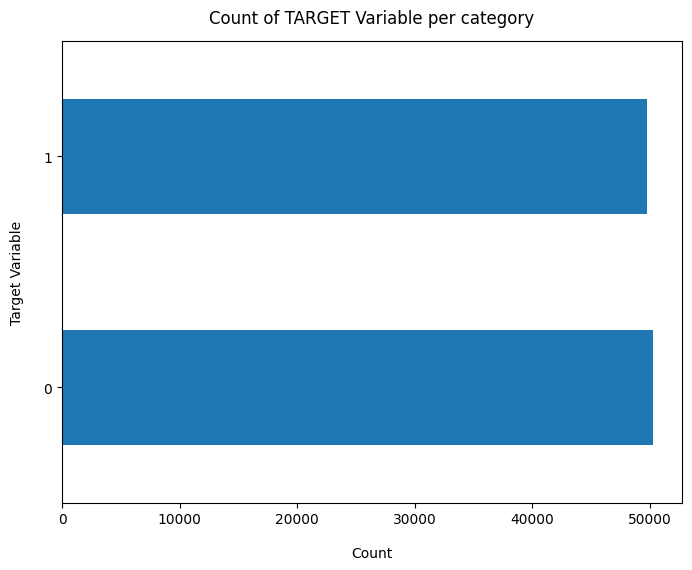

In [ ]:
churn['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [ ]:
100*churn['Churn'].value_counts()/len(churn['Churn'])

Churn
0    50.221
1    49.779
Name: count, dtype: float64

In [ ]:
churn['Churn'].value_counts()

Churn
0    50221
1    49779
Name: count, dtype: int64

#### Inshight:

* Data is balanced, ratio = 50.221:49.779

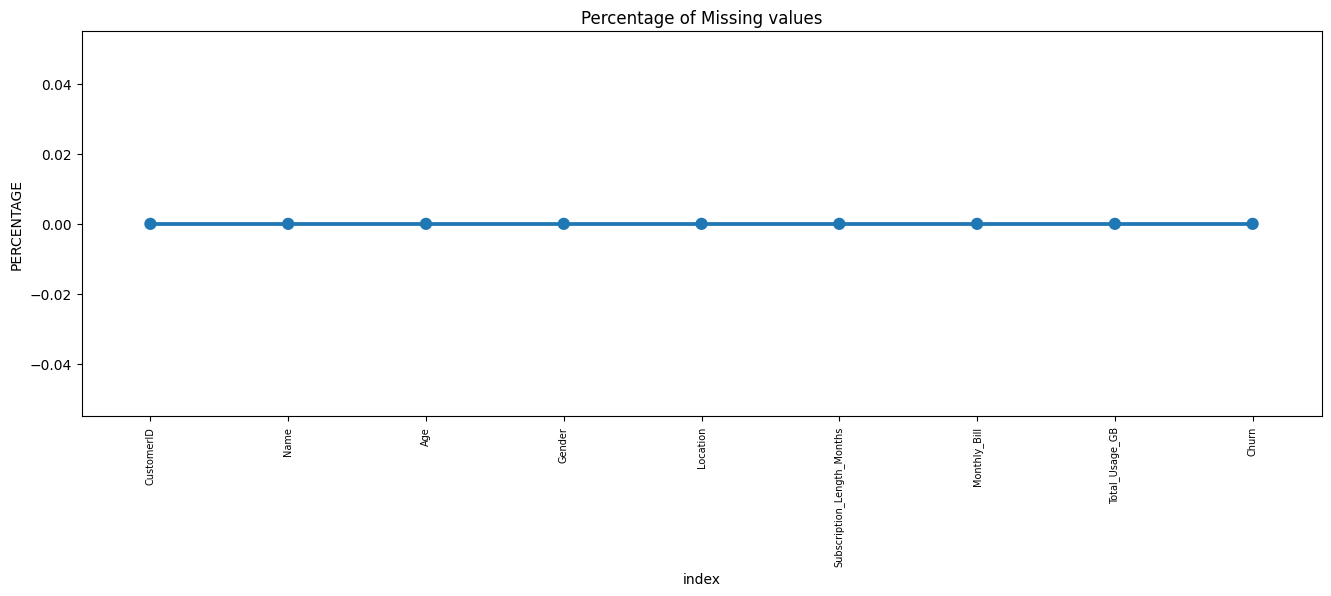

In [ ]:
missing = pd.DataFrame((churn.isnull().sum())*100/churn.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=7)
ax.set(title="Percentage of Missing values", ylabel="PERCENTAGE")
plt.show()


In [ ]:
missing

,index,0
0,CustomerID,0.0
1,Name,0.0
2,Age,0.0
3,Gender,0.0
4,Location,0.0
5,Subscription_Length_Months,0.0
6,Monthly_Bill,0.0
7,Total_Usage_GB,0.0
8,Churn,0.0


## Data Looks clean only so there no need to much cleaning or anything

In [ ]:
# Get the max Subscription_Length_Months
print(churn['Subscription_Length_Months'].max()) 

24


In [ ]:
# Define labels for the bins
labels = ['0-6', '6-12', '12-18', '18-24']

# Create a new column with the grouped subscription length
churn['Subscription_Length_Months_group'] = pd.cut(churn['Subscription_Length_Months'], bins=[0, 6, 12, 18, 24], labels=labels)

# Display the count of customers in each group
group_counts = churn['Subscription_Length_Months_group'].value_counts()
print(group_counts)

Subscription_Length_Months_group
0-6      25064
18-24    25026
6-12     24957
12-18    24953
Name: count, dtype: int64


# `Here are the insights based on the grouped subscription length:`

- **Subscription Length Distribution:**
  - The majority of customers fall into two groups:
    - 0-6 months: There are 25,064 customers who have subscribed for 0-6 months, indicating a significant number of new customers or those with relatively short subscription periods.
    - 18-24 months: There are 25,026 customers who have subscribed for 18-24 months, suggesting a sizable group of long-term customers.
  - The other two groups, 6-12 months and 12-18 months, have very similar counts, with 24,957 and 24,953 customers, respectively.

- **Balanced Distribution:** 
  - The distribution of customers among the four subscription length groups appears relatively balanced, with each group containing a similar number of customers. This balance is important when considering customer behavior analysis and targeted marketing strategies.

- **Churn and Retention Analysis:**
  - The distribution of customers across these groups can be further analyzed to understand churn and retention patterns. For instance, comparing the churn rates within each group could provide insights into whether customers with shorter or longer subscription lengths are more likely to churn.

- **Marketing Strategy Insights:**
  - Understanding the subscription length distribution can guide marketing and customer engagement strategies. For example, marketing efforts can be tailored differently for new customers in the 0-6 months group compared to loyal long-term customers in the 18-24 months group.

- **Product Offerings:**
  - Product or service offerings can also be customized based on subscription length. Long-term customers may benefit from loyalty programs or exclusive offers, while newer customers may respond well to introductory promotions.

These insights into subscription length distribution provide a starting point for deeper analysis and decision-making in customer retention, marketing, and product development strategies.

In [ ]:
#drop column customerID and tenure
churn.drop(columns= ['CustomerID','Name'], axis=1, inplace=True)
churn.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Subscription_Length_Months_group
0,63,Male,Los Angeles,17,73.36,236,0,12-18
1,62,Female,New York,1,48.76,172,0,0-6
2,24,Female,Los Angeles,5,85.47,460,0,0-6
3,36,Female,Miami,3,97.94,297,1,0-6
4,46,Female,Miami,19,58.14,266,0,18-24


## Data Exploration
*1.  Plot distibution of individual predictors by churn*

### Univariate Analysis

Text(0.5, 1.0, 'Monthly Charges Distribution by Churn')

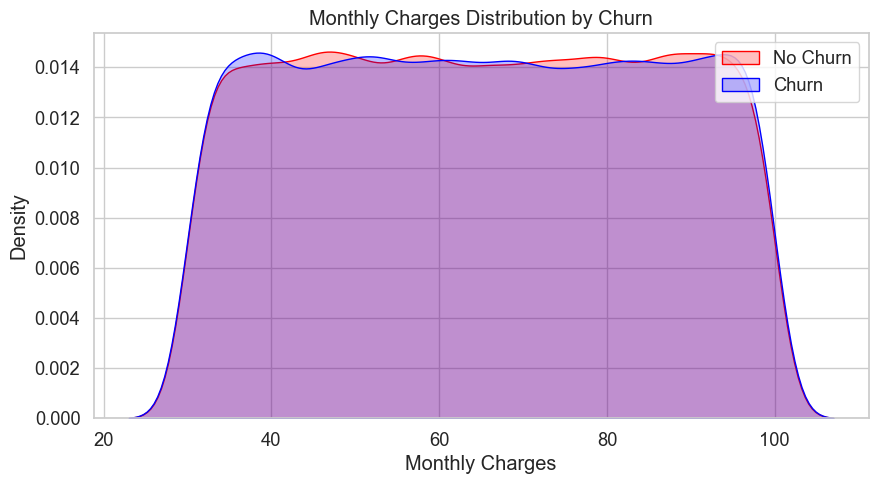

In [ ]:
#Plotting the monthly charges by churn using kdeplot
plt.figure(figsize=(10,5))
mth = sns.kdeplot(churn.Monthly_Bill[(churn["Churn"] == 0) ],
color="Red", shade = True)
mth = sns.kdeplot(churn.Monthly_Bill[(churn["Churn"] == 1) ],
ax = mth, color="Blue", shade= True)

#Set the legend and axis labels
mth.legend(["No Churn","Churn"],loc='upper right')
mth.set_ylabel('Density')
mth.set_xlabel('Monthly Charges')
mth.set_title('Monthly Charges Distribution by Churn')



Text(0.5, 1.0, 'Total_Usage_GB by churn')

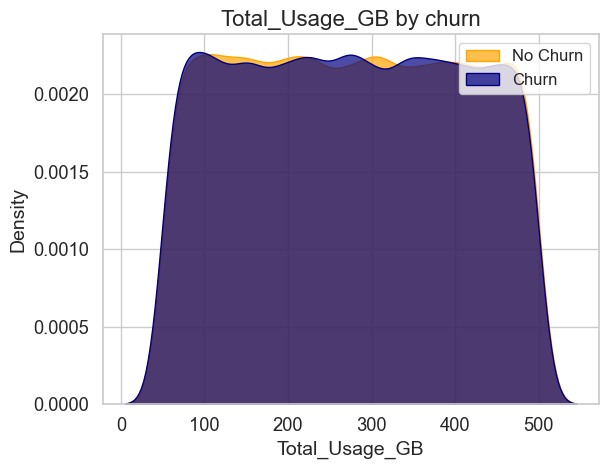

In [ ]:
sns.set_style("whitegrid")
Tot = sns.kdeplot(churn.Total_Usage_GB[(churn["Churn"] == 0) ],
                color="orange", shade = True, label="No Churn", alpha=.7, palette="husl")
Tot = sns.kdeplot(churn.Total_Usage_GB[(churn["Churn"] == 1) ],
                ax =Tot, color="navy", shade= True, label="Churn", alpha=.7, palette="husl")
Tot.legend(loc='upper right', fontsize=12)
Tot.set_ylabel('Density', fontsize=14)
Tot.set_xlabel('Total_Usage_GB', fontsize=14)
Tot.set_title('Total_Usage_GB by churn', fontsize=16)


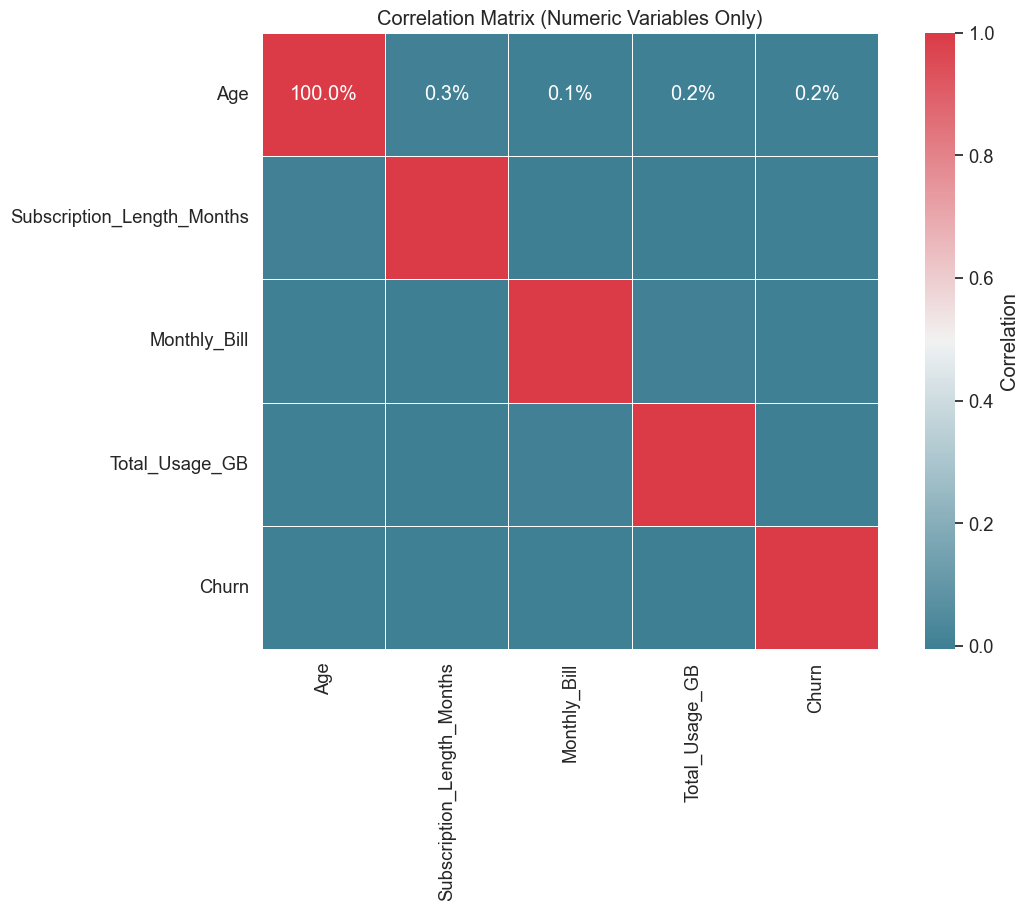

In [ ]:
# Select numeric columns
numeric_columns = churn.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Define a custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create a heatmap with improved appearance and percentage annotation
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".1%",
    cmap=cmap,
    cbar_kws={'label': 'Correlation'},
    square=True,
    linewidths=0.5
)

# Add a title
plt.title('Correlation Matrix (Numeric Variables Only)')

# Show the plot
plt.show()


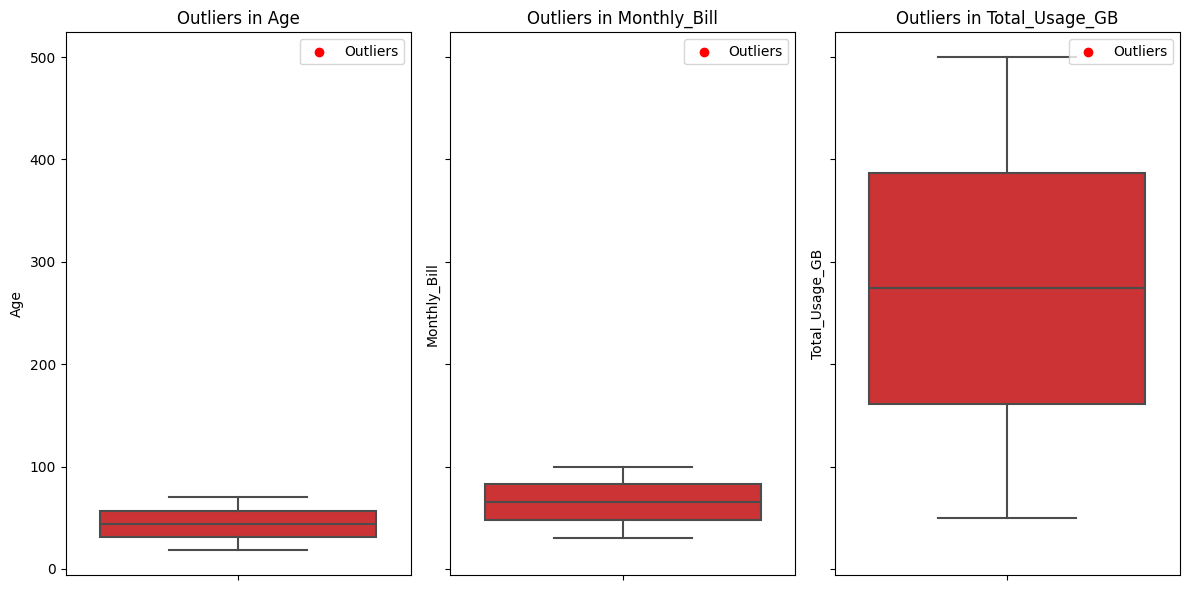

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_outliers_box(data, columns_to_check, figsize=(12, 6), threshold=1.5):
    """
    Create box plots to check for outliers in specified columns of the DataFrame.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        columns_to_check (list): List of column names to check for outliers.
        figsize (tuple): Figure size (width, height).
        threshold (float): Threshold for identifying outliers (default is 1.5 times the IQR).

    Returns:
        None (displays the box plots).
    """
    # Create a figure with subplots
    num_plots = len(columns_to_check)
    fig, axes = plt.subplots(1, num_plots, figsize=figsize, sharey=True)

    for i, column in enumerate(columns_to_check):
        ax = axes[i]

        # Create a box plot
        sns.boxplot(data=data, y=column, ax=ax, palette="Set1")
        ax.set_title(f"Outliers in {column}")

        # Calculate the IQR and identify outliers
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        # Highlight outliers
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        ax.scatter(outliers.index, outliers[column], color='red', label='Outliers')

        ax.legend(loc='upper right')
        ax.set_xlabel('')

    plt.tight_layout()
    plt.show()

# Example usage:
# Specify the columns to check for outliers and call the function
columns_to_check = ['Age', 'Monthly_Bill', 'Total_Usage_GB']
plot_outliers_box(churn, columns_to_check)


# There is no Outlairs even in the dataset.

In [ ]:
# Define function to create countplot
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='husl') 
        
    plt.show()



In [58]:
churn

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Subscription_Length_Months_group
0,63,Male,Los Angeles,17,73.36,236,0,12-18
1,62,Female,New York,1,48.76,172,0,0-6
2,24,Female,Los Angeles,5,85.47,460,0,0-6
3,36,Female,Miami,3,97.94,297,1,0-6
4,46,Female,Miami,19,58.14,266,0,18-24
...,...,...,...,...,...,...,...,...
99995,33,Male,Houston,23,55.13,226,1,18-24
99996,62,Female,New York,19,61.65,351,0,18-24
99997,64,Male,Chicago,17,96.11,251,1,12-18
99998,51,Female,New York,20,49.25,434,1,18-24


In [12]:
# Group the data by Location, Gender, and Churn, and count the number of customers in each group
grouped = churn.groupby(['Location', 'Gender', 'Churn']).size().reset_index(name='Count')

# Pivot the table to have Churn and Not Churn counts as separate columns
pivot_table = grouped.pivot_table(index=['Location', 'Gender'], columns='Churn', values='Count', fill_value=0).reset_index()

# Rename the columns for clarity
pivot_table.columns = ['Location', 'Gender', 'Not Churn', 'Churn']

# Display the resulting DataFrame
print(pivot_table)


      Location  Gender  Not Churn   Churn
0      Chicago  Female     5039.0  4997.0
1      Chicago    Male     4974.0  4948.0
2      Houston  Female     5079.0  4918.0
3      Houston    Male     5179.0  4981.0
4  Los Angeles  Female     5163.0  4928.0
5  Los Angeles    Male     4998.0  4952.0
6        Miami  Female     4984.0  5106.0
7        Miami    Male     4971.0  4970.0
8     New York  Female     5007.0  4995.0
9     New York    Male     4827.0  4984.0


# WoW its a Highly Balanced Dataset and 50% churn ratio is everywhere!!
## Lets jump into model building then.